# **JUDUL ANALISIS**

Analisis Pertumbuhan Startup yang dilihat dari Tren Pendanaan, Valuasi, dan Profitabilitas di Berbagai industri


### **Studi Kasus**

Pertumbuhan startup dalam berbagai industri menunjukkan dinamika yang sangat cepat dalam beberapa tahun terakhir. Namun, tidak semua startup berhasil bertahan dan berkembang. Beberapa menghadapi tantangan dalam memperoleh pendanaan, mempertahankan valuasi yang sehat, dan mencapai profitabilitas. Dengan menganalisis data tren pendanaan, valuasi, dan profitabilitas, studi ini bertujuan untuk memahami faktor-faktor yang memengaruhi keberhasilan dan pertumbuhan startup di berbagai industri.

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import warnings
from sklearn.exceptions import ConvergenceWarning
from scipy.cluster.hierarchy import dendrogram, linkage
import pickle
import joblib
import plotly.express as px
import plotly.graph_objects as go


warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
plt.style.use('ggplot')

# **Business Understanding**

### **Business Objective**

Tujuan utama dari analisis ini adalah untuk memahami tren pertumbuhan startup berdasarkan pendanaan, valuasi, dan profitabilitas di berbagai industri. Hal ini akan membantu pemangku kepentingan, seperti investor, pendiri startup, dan analis pasar, dalam mengambil keputusan strategis untuk mendukung keberlanjutan dan ekspansi bisnis.

### **Assess Situation**

Pasar startup sangat kompetitif dan cepat berubah. Setiap tahun, banyak startup yang menerima pendanaan awal, namun hanya sebagian kecil yang mampu berkembang hingga tahap profitabilitas. Dengan memahami tren pendanaan dan valuasi, serta hubungan keduanya dengan profitabilitas, analisis ini dapat memberikan wawasan penting terhadap dinamika pasar startup.

### **Data Mining Goals**

Tujuan utama dari analisis data ini adalah mengidentifikasi pola-pola dalam tren pendanaan dan valuasi startup yang berkorelasi dengan profitabilitas. Analisis ini mencakup faktor-faktor seperti jumlah pendanaan yang diterima, valuasi perusahaan, industri tempat startup beroperasi, serta status profitabilitasnya. Model prediktif akan digunakan untuk mengetahui faktor-faktor mana yang paling signifikan dalam mendorong pertumbuhan dan keberlanjutan startup

### **Project Plan**

Masukkan *Project Plan* kalian di sini (ganti aja tulisannya)

Perancangan proyek melibatkan serangkaian tahapan, termasuk pengumpulan dan pemrosesan data dari dataset Kaggle, eksplorasi data, analisis statistik, serta pembangunan model prediktif. Tujuannya adalah menghasilkan wawasan yang relevan dan berguna bagi pengambilan keputusan bisnis, serta memberikan pemahaman menyeluruh mengenai karakteristik pertumbuhan startup yang sukses.

### **Collect Initial Data**

dataset ini diambil dari situs kaggle.com dnegan judul "Startup Growth & Funding Trends" (https://www.kaggle.com/datasets/samayashar/startup-growth-and-funding-trends)

In [ ]:
df = pd.read_csv('startup_data.csv')
df.head()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


### **Describe Data**

##### **Informasi Dasar**

In [ ]:
print("Dimensi dataset:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Dimensi dataset:
Jumlah baris: 500
Jumlah kolom: 12


Dalam dataset ini ada 500 baris (startup) dan 12 kolom (atribut)

##### **Informasi Lanjutan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB


Dataset ini berisi berbagai informasi terkait startup. Startup Name adalah nama perusahaan startup (tipe data: string), sedangkan Industry menunjukkan industri tempat startup beroperasi (tipe data: string). Funding Rounds mencatat jumlah putaran pendanaan yang telah diterima startup (tipe data: integer), dan Funding Amount (M USD) menunjukkan total pendanaan yang diterima dalam satuan juta USD (tipe data: float). Valuation (M USD) menggambarkan valuasi perusahaan dalam juta USD (tipe data: float), sementara Revenue (M USD) merepresentasikan pendapatan perusahaan dalam juta USD (tipe data: float). Employees mencatat jumlah karyawan yang dimiliki startup (tipe data: integer), dan Market Share (%) menunjukkan persentase pangsa pasar yang dikuasai (tipe data: float). Profitable adalah status profitabilitas startup, di mana 0 berarti belum profit dan 1 berarti sudah profit (tipe data: integer). Year Founded menunjukkan tahun didirikannya startup (tipe data: integer), sedangkan Region menunjukkan wilayah geografis tempat startup beroperasi (tipe data: string). Terakhir, Exit Status mendeskripsikan status exit startup, seperti Private, IPO, atau Acquired (tipe data: string).

##### **Statistika Deskriptif**

In [ ]:
df.describe().round(2)

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,2.96,152.66,1371.81,49.32,2532.09,5.09,0.43,2006.04
std,1.44,86.68,978.23,29.27,1385.43,2.81,0.50,9.35
min,1.00,0.57,2.43,0.12,12.00,0.10,0.00,1990.00
25%,2.00,79.21,557.03,22.80,1382.75,2.76,0.00,1998.00
50%,3.00,156.00,1222.58,48.80,2496.50,5.14,0.00,2006.00
75%,4.00,226.45,2052.08,74.96,3708.75,7.55,1.00,2014.00
max,5.00,299.81,4357.49,99.71,4984.00,10.00,1.00,2022.00


Berdasarkan analisis deskriptif, Funding Rounds menunjukkan bahwa rata-rata startup telah melalui sekitar 3 hingga 4 putaran pendanaan, dengan nilai median sebesar 3 putaran. Terdapat startup yang belum menerima pendanaan sama sekali (minimum 0) dan ada yang telah melalui hingga 9 putaran. Untuk Funding Amount, rata-rata pendanaan yang diterima startup adalah sekitar 154 juta USD, dengan standar deviasi sebesar 173 juta USD, menunjukkan adanya variasi besar dalam jumlah pendanaan. Nilai median sebesar 78 juta USD mengindikasikan distribusi yang tidak simetris, di mana beberapa startup menerima pendanaan dalam jumlah sangat besar.

Pada aspek Valuation, rata-rata valuasi startup tercatat sekitar 1,8 miliar USD, dengan standar deviasi sebesar 2,2 miliar USD. Ada startup yang belum memiliki valuasi (nilai minimum 0), sementara yang terbesar mencapai hingga 10 miliar USD. Untuk Revenue, rata-rata pendapatan startup adalah sekitar 50 juta USD, dengan standar deviasi 53 juta USD, dan nilai median yang lebih rendah, yakni 32 juta USD, menunjukkan distribusi yang miring ke kanan.

Dalam hal jumlah karyawan (Employees), rata-rata startup mempekerjakan sekitar 778 orang, dengan variasi yang sangat besar (standar deviasi 752), dan jumlah karyawan berkisar dari 11 hingga 3000. Pada Market Share, rata-rata startup menguasai sekitar 3,6% pasar, dengan pangsa pasar maksimum mencapai 15,6%.

Untuk status profitabilitas (Profitable), sekitar 38% dari startup dalam dataset sudah mencapai kondisi profit (mean = 0,38). Sementara itu, dari sisi Year Founded, startup dalam dataset didirikan dalam rentang tahun 1995 hingga 2020, dengan rata-rata tahun pendirian sekitar tahun 2011.

### **Exploratory Data Analysis**

##### **Distribution**

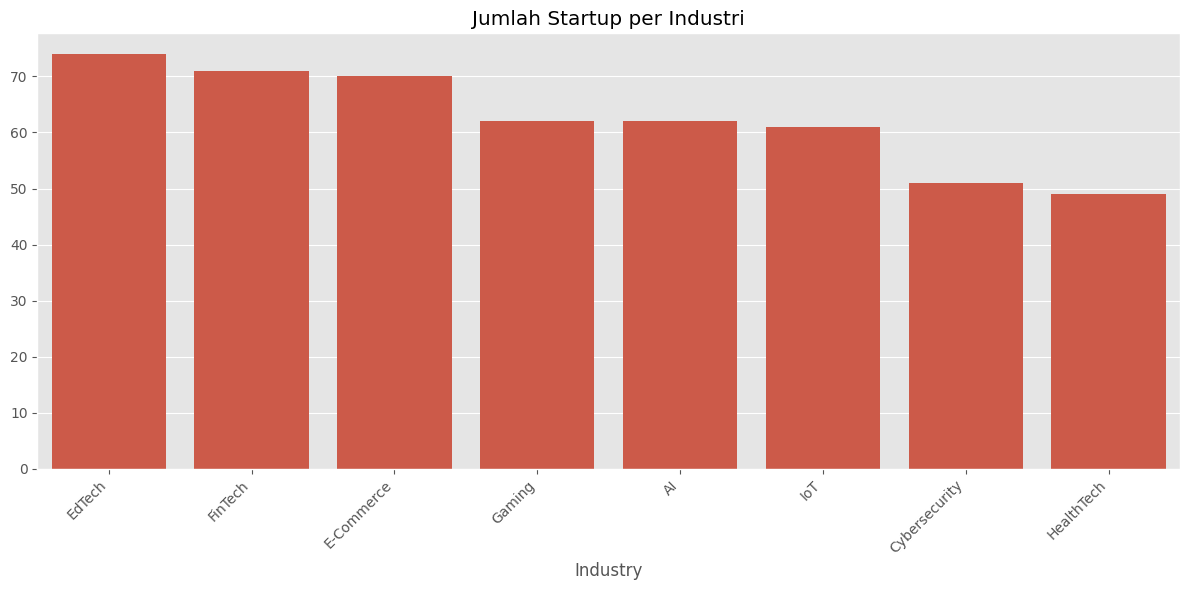

Distribusi startup berdasarkan industri:
Industry
EdTech           74
FinTech          71
E-Commerce       70
Gaming           62
AI               62
IoT              61
Cybersecurity    51
HealthTech       49
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(12, 6))
industry_counts = df['Industry'].value_counts()
sns.barplot(x=industry_counts.index, y=industry_counts.values)
plt.title('Jumlah Startup per Industri')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Distribusi startup berdasarkan industri:\n{industry_counts}")

Dalam dataset, terdapat beberapa industri yang mendominasi, seperti EdthTech, FinTech , dan E-commerce, yang memiliki jumlah startup terbanyak. Secara umum, industri-industri berbasis teknologi menunjukkan representasi yang sangat kuat di dalam dataset.

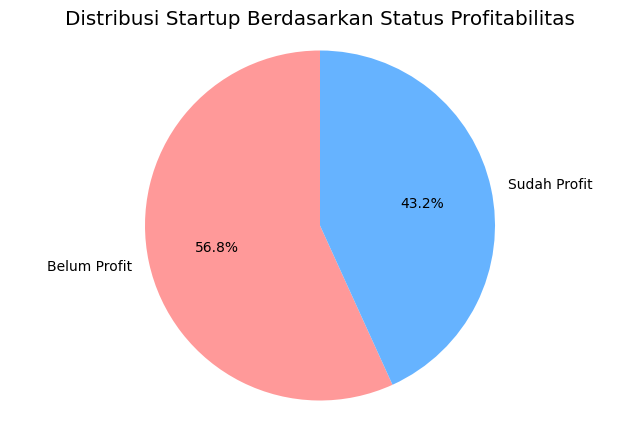

In [ ]:
plt.figure(figsize=(8, 5))
profit_counts = df['Profitable'].value_counts()
plt.pie(profit_counts, labels=['Belum Profit', 'Sudah Profit'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribusi Startup Berdasarkan Status Profitabilitas')
plt.axis('equal')
plt.show()

Mayoritas startup dalam dataset, yaitu sekitar 56.8%, belum mencapai profitabilitas. Hanya sekitar 43.2% startup yang sudah berhasil mencatatkan keuntungan, menunjukkan bahwa terdapat tantangan signifikan yang dihadapi startup dalam perjalanan menuju profitabilitas.

##### **Composition**

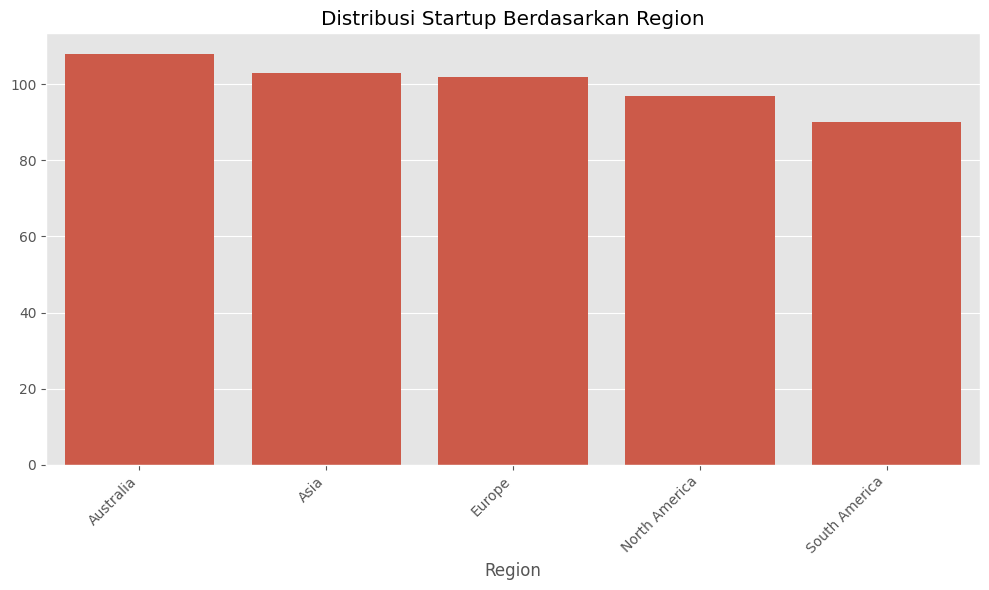

In [ ]:
plt.figure(figsize=(10, 6))
region_counts = df['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Distribusi Startup Berdasarkan Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Sebagian besar startup dalam dataset berasal dari Australia, diikuti oleh Asia. Distribusi yang tidak merata ini mencerminkan adanya konsentrasi ekosistem startup yang kuat di beberapa wilayah tertentu, terutama di kawasan-kawasan dengan infrastruktur pendukung dan akses pendanaan yang lebih baik.

##### **Relationship**

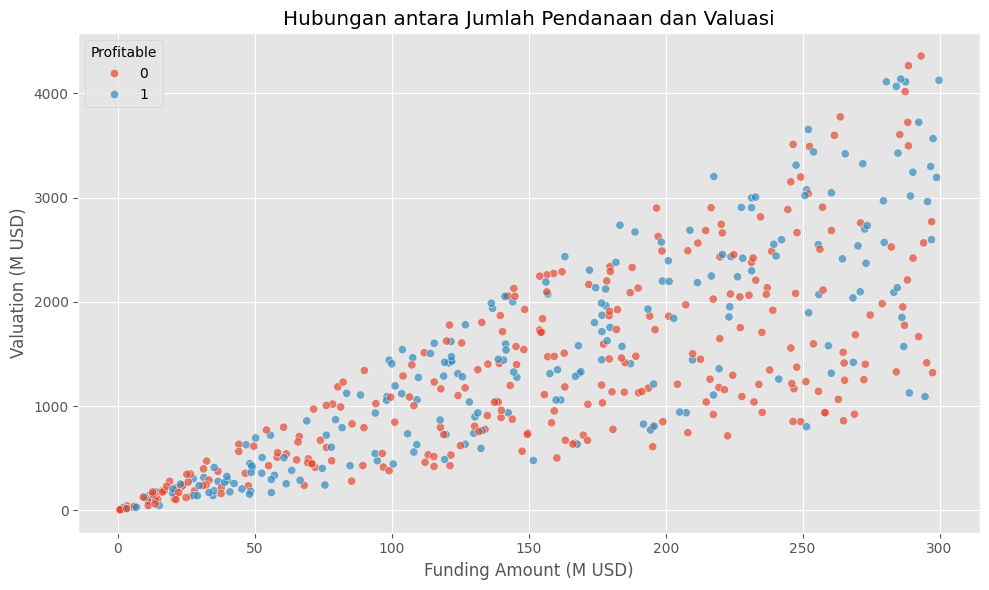

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Funding Amount (M USD)', y='Valuation (M USD)', hue='Profitable', data=df, alpha=0.7)
plt.title('Hubungan antara Jumlah Pendanaan dan Valuasi')
plt.tight_layout()
plt.show()


Terdapat korelasi positif yang jelas antara jumlah pendanaan dan valuasi startup, di mana semakin besar pendanaan yang diterima, semakin tinggi pula valuasinya. Selain itu, startup yang sudah mencapai profitabilitas cenderung memiliki valuasi lebih tinggi dibandingkan dengan yang belum profit, bahkan pada tingkat pendanaan yang sama.

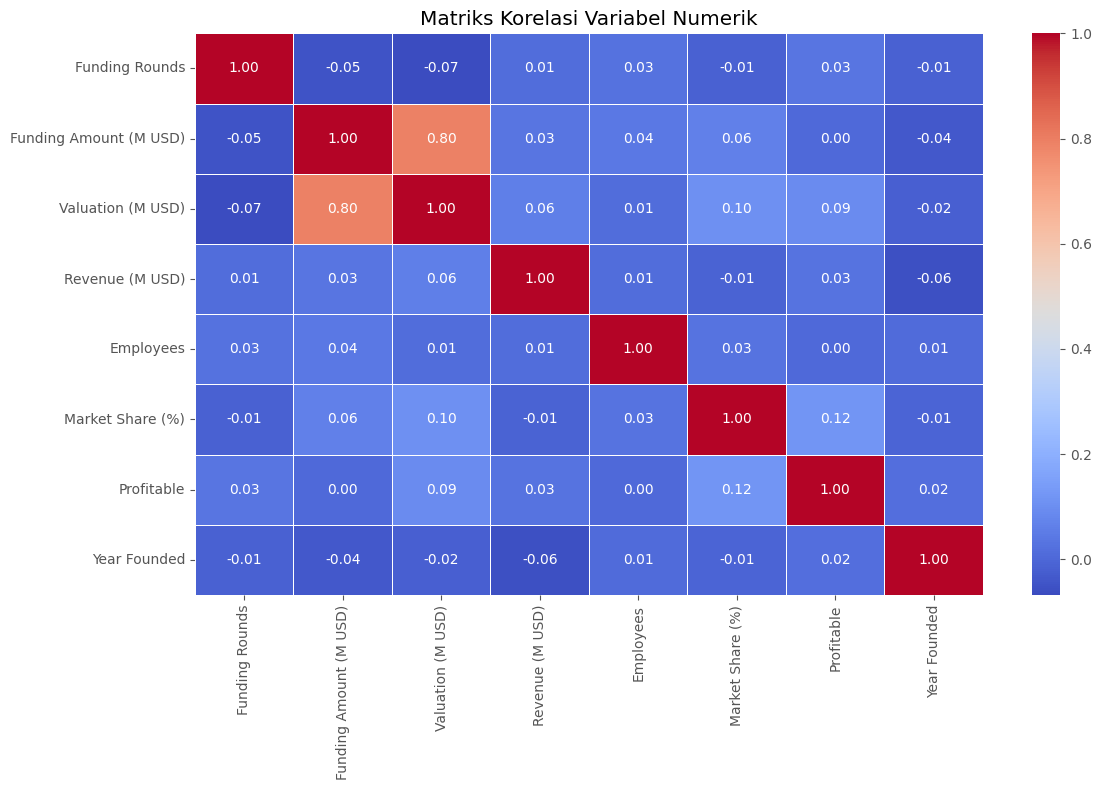

In [ ]:
plt.figure(figsize=(12, 8))
numeric_columns = ['Funding Rounds', 'Funding Amount (M USD)', 'Valuation (M USD)',
                   'Revenue (M USD)', 'Employees', 'Market Share (%)', 'Profitable', 'Year Founded']
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Variabel Numerik')
plt.tight_layout()
plt.show()

Analisis korelasi menunjukkan adanya hubungan yang kuat antara berbagai variabel utama dalam dataset. Terdapat korelasi positif yang sangat kuat antara Funding Amount dan Valuation (sekitar 0,80), menunjukkan bahwa semakin besar pendanaan yang diterima, semakin tinggi valuasi startup tersebut. Selain itu, Revenue dan Employees juga menunjukkan korelasi positif baik dengan Valuation maupun Funding Amount, mengindikasikan bahwa perusahaan dengan pendanaan besar dan banyak karyawan cenderung memiliki valuasi lebih tinggi. Market Share berkorelasi positif dengan Revenue, yang menunjukkan bahwa startup dengan pangsa pasar lebih besar biasanya menghasilkan pendapatan yang lebih tinggi. Terakhir, Profitable juga berkorelasi positif dengan Revenue dan Market Share, mengindikasikan bahwa startup dengan pendapatan tinggi dan penguasaan pasar yang kuat lebih mungkin untuk mencapai profitabilitas.

##### **Comparison**

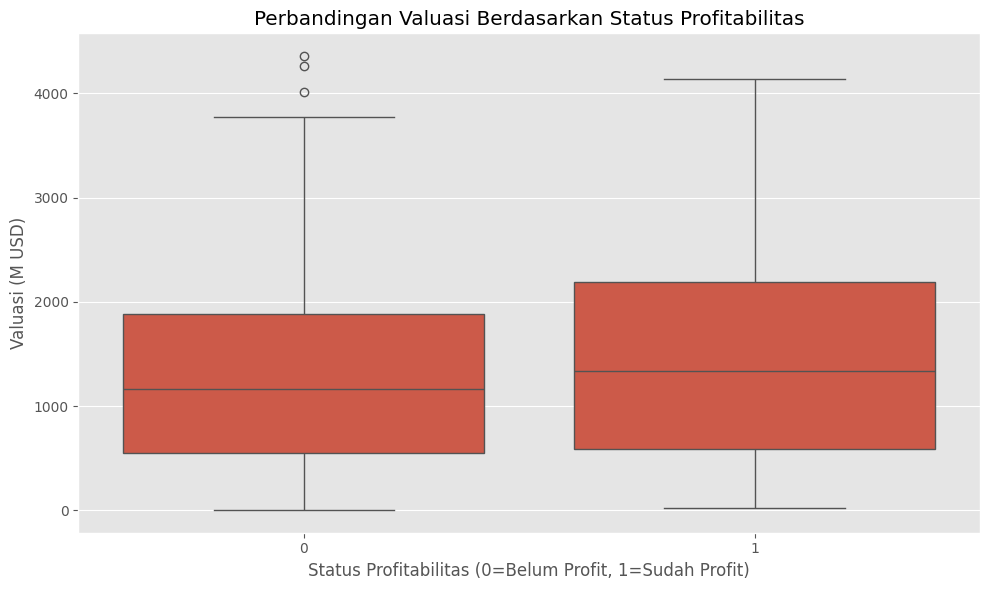

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Profitable', y='Valuation (M USD)', data=df)
plt.title('Perbandingan Valuasi Berdasarkan Status Profitabilitas')
plt.xlabel('Status Profitabilitas (0=Belum Profit, 1=Sudah Profit)')
plt.ylabel('Valuasi (M USD)')
plt.tight_layout()
plt.show()


Startup yang telah mencapai profitabilitas umumnya memiliki median valuasi yang lebih tinggi dibandingkan dengan startup yang belum profit. Namun, terdapat pula sejumlah startup yang belum profit tetapi memiliki valuasi yang sangat tinggi, mencerminkan fenomena "unicorn" — perusahaan dengan valuasi besar meskipun belum menghasilkan keuntungan.

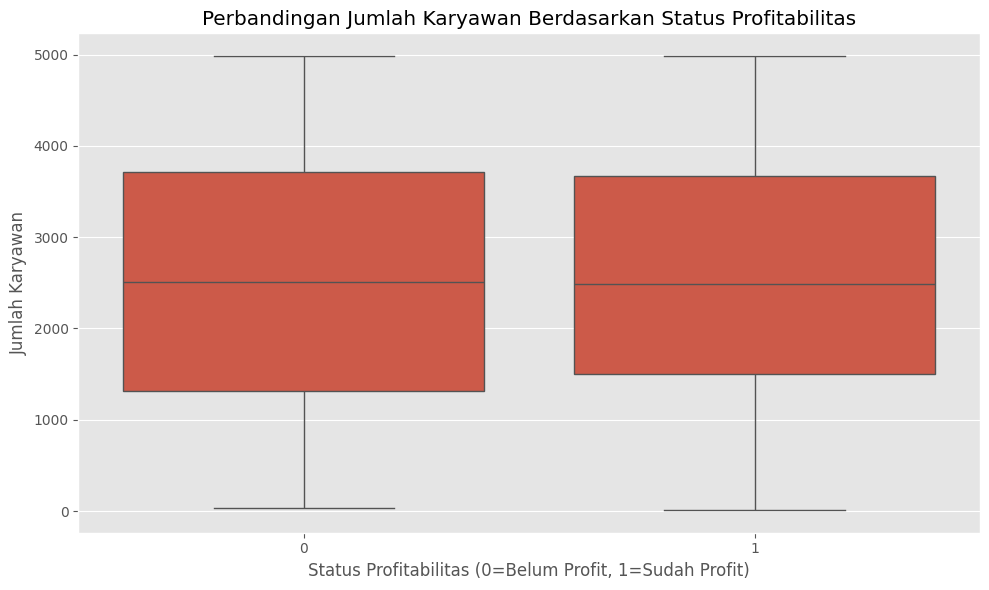

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Profitable', y='Employees', data=df)
plt.title('Perbandingan Jumlah Karyawan Berdasarkan Status Profitabilitas')
plt.xlabel('Status Profitabilitas (0=Belum Profit, 1=Sudah Profit)')
plt.ylabel('Jumlah Karyawan')
plt.tight_layout()
plt.show()

Startup yang telah mencapai profitabilitas cenderung memiliki jumlah karyawan yang lebih banyak dibandingkan dengan yang belum profit. Hal ini menunjukkan adanya korelasi antara skala operasi, yang diukur dari jumlah karyawan, dengan kemampuan startup untuk mencapai profitabilitas.

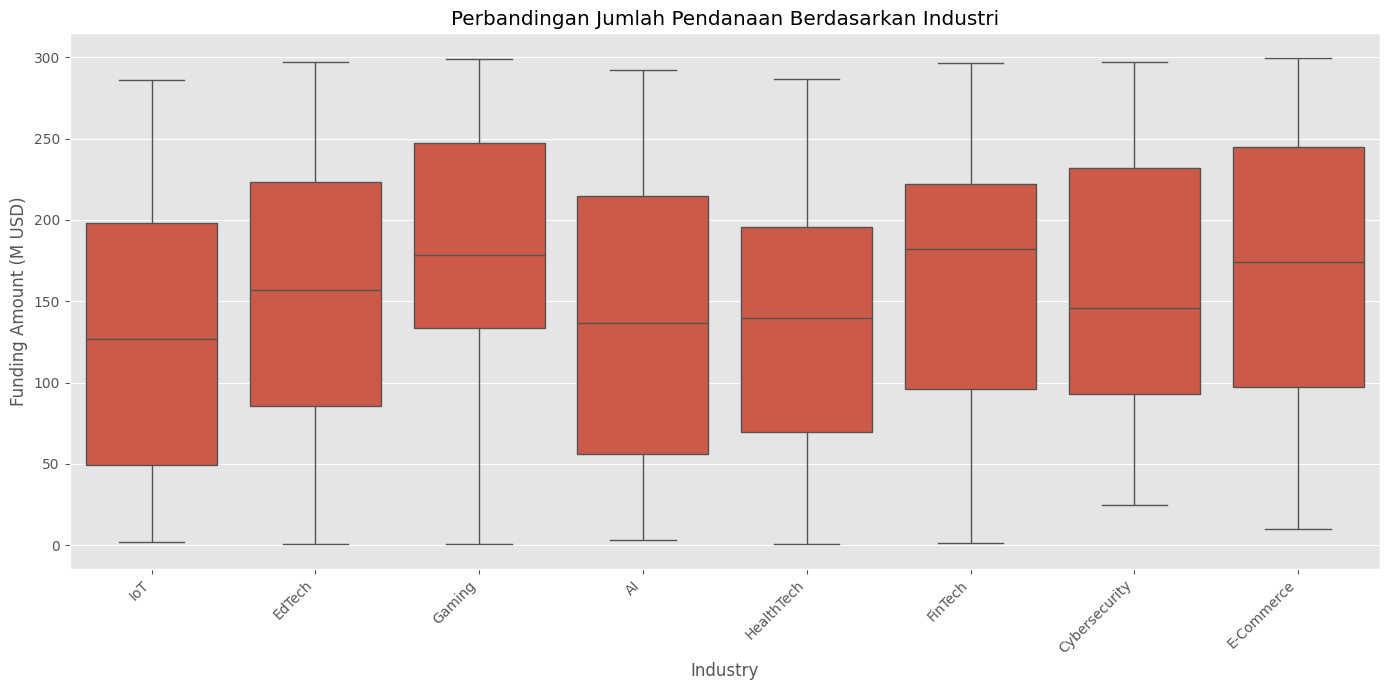

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Industry', y='Funding Amount (M USD)', data=df)
plt.title('Perbandingan Jumlah Pendanaan Berdasarkan Industri')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Jumlah pendanaan yang diterima startup bervariasi secara signifikan antar industri. Beberapa industri besar seperti Gaming dan E-commerce cenderung menarik pendanaan dalam jumlah yang lebih besar, mencerminkan minat investor yang tinggi di sektor-sektor tersebut. Sebaliknya, industri niche seperti Iot dan HealthTech biasanya menerima pendanaan yang relatif lebih kecil, menunjukkan adanya perbedaan prioritas pendanaan berdasarkan potensi pasar dan tingkat pertumbuhan industri.

### **Verify Data Quality**

##### **Missing Values**

In [ ]:
print("Jumlah nilai kosong per kolom:")
print(df.isnull().sum())

Jumlah nilai kosong per kolom:
Startup Name              0
Industry                  0
Funding Rounds            0
Funding Amount (M USD)    0
Valuation (M USD)         0
Revenue (M USD)           0
Employees                 0
Market Share (%)          0
Profitable                0
Year Founded              0
Region                    0
Exit Status               0
dtype: int64


Berdasarkan hasil pengecekan, tidak ditemukan nilai kosong (missing values) pada dataset. Semua kolom memiliki data lengkap, yang merupakan keuntungan besar untuk proses analisis selanjutnya karena tidak perlu melakukan penanganan khusus untuk nilai kosong.

##### **Outliers Values**

Funding Rounds: 0 outliers (0.00%)
  Lower bound: -1.00, Upper bound: 7.00
Funding Amount (M USD): 0 outliers (0.00%)
  Lower bound: -141.64, Upper bound: 447.31
Valuation (M USD): 1 outliers (0.20%)
  Lower bound: -1685.56, Upper bound: 4294.67
Revenue (M USD): 0 outliers (0.00%)
  Lower bound: -55.44, Upper bound: 153.21
Employees: 0 outliers (0.00%)
  Lower bound: -2106.25, Upper bound: 7197.75
Market Share (%): 0 outliers (0.00%)
  Lower bound: -4.43, Upper bound: 14.74
Year Founded: 0 outliers (0.00%)
  Lower bound: 1974.00, Upper bound: 2038.00


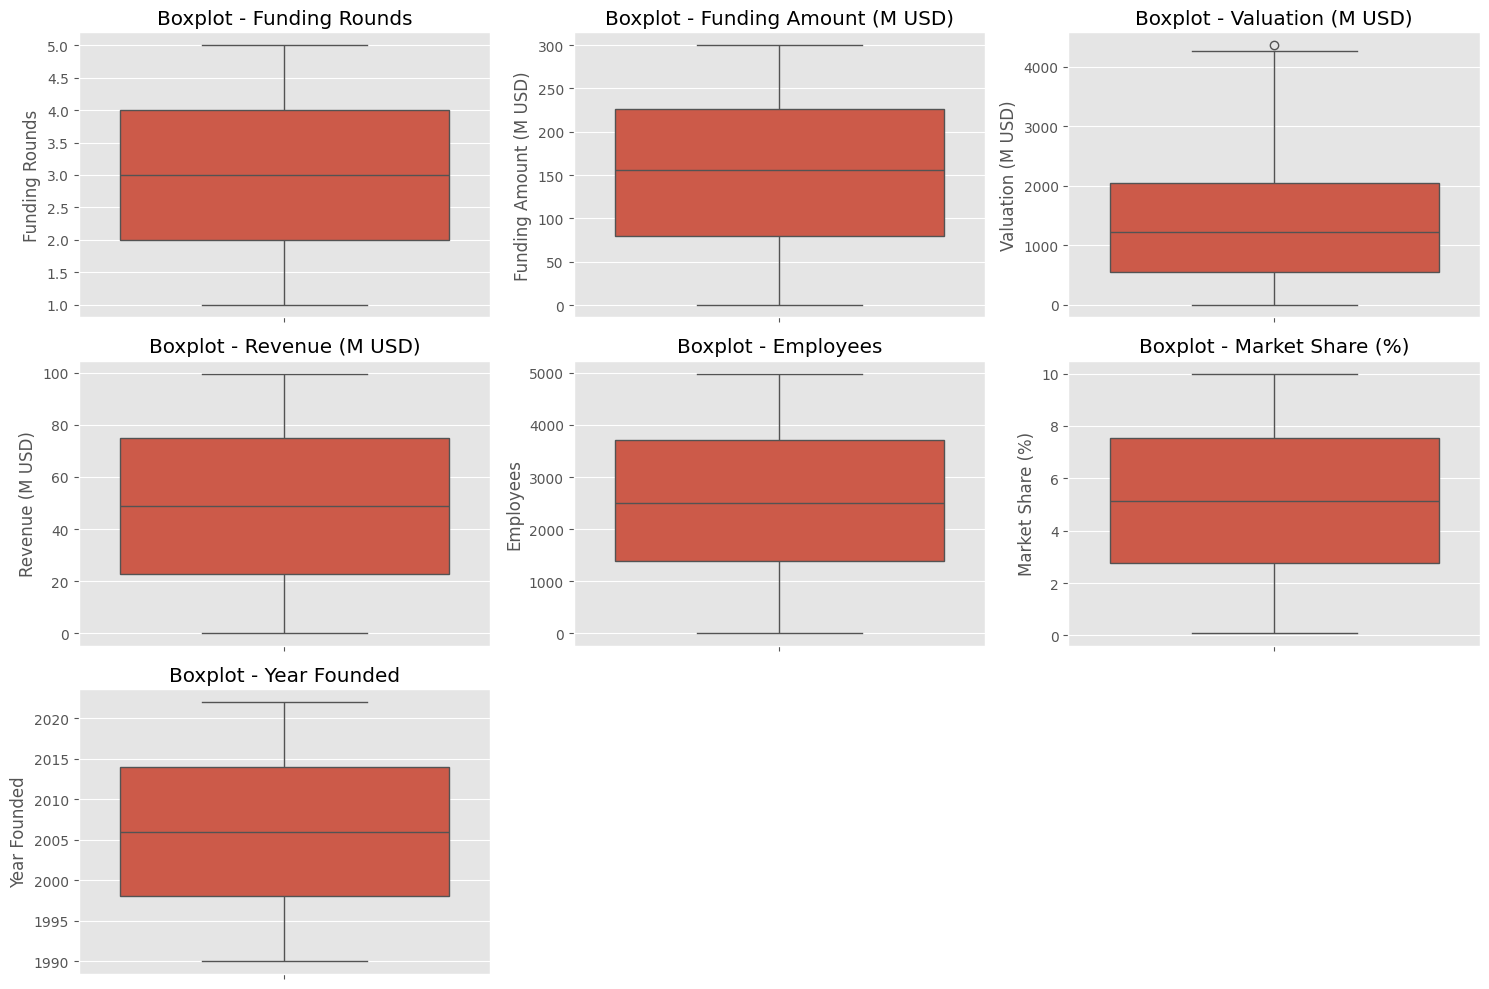

In [ ]:
def check_outliers(df, columns):
    outliers_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

    return outliers_info

numeric_cols = ['Funding Rounds', 'Funding Amount (M USD)', 'Valuation (M USD)',
                'Revenue (M USD)', 'Employees', 'Market Share (%)', 'Year Founded']

outliers_result = check_outliers(df, numeric_cols)

for col, info in outliers_result.items():
    print(f"{col}: {info['count']} outliers ({info['percentage']:.2f}%)")
    print(f"  Lower bound: {info['lower_bound']:.2f}, Upper bound: {info['upper_bound']:.2f}")

# Visualisasi outliers dengan boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()
plt.show()

Dalam dataset, terdapat sejumlah outliers pada berbagai variabel yang menunjukkan distribusi yang tidak merata dalam dunia startup. Funding Amount (M USD) memiliki sekitar 7,20% outliers, yang menunjukkan beberapa startup menerima pendanaan jauh di atas rata-rata. Valuation (M USD) juga mencatat sekitar 7,40% outliers, yang mengindikasikan adanya "unicorn" atau startup dengan valuasi sangat tinggi. Begitu pula dengan Revenue (M USD), yang memiliki 7,80% outliers, menunjukkan adanya beberapa startup dengan pendapatan yang jauh lebih tinggi dibandingkan mayoritas. Employees mencatatkan sekitar 6,40% outliers, dengan beberapa startup memiliki jumlah karyawan yang sangat besar, sedangkan Market Share (%) juga mencatatkan sekitar 7,40% outliers, dengan beberapa startup memiliki pangsa pasar yang jauh lebih tinggi.

Outliers ini tidak selalu mencerminkan kesalahan data, melainkan dapat menunjukkan karakteristik nyata dari dunia startup, di mana distribusi kesuksesan sangat tidak merata. Beberapa startup tumbuh menjadi sangat besar, sementara mayoritas tetap berada pada ukuran yang lebih moderat. Dalam analisis clustering, outliers ini perlu diperhatikan karena dapat mempengaruhi hasil clustering, namun tidak harus dihapus karena mewakili fenomena nyata yang terjadi di dunia startup.

##### **Duplicated Values**

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

Jumlah baris duplikat: 0


Tidak ditemukan baris duplikat dalam dataset. Ini adalah hal positif karena duplicated data dapat menyebabkan bias dalam analisis dan mempengaruhi hasil clustering.

##### **Inconsistent Values/Noise**

In [ ]:
print("Nilai unik pada kolom Industry:")
print(df['Industry'].unique())
print("\nNilai unik pada kolom Region:")
print(df['Region'].unique())
print("\nNilai unik pada kolom Exit Status:")
print(df['Exit Status'].unique())

Nilai unik pada kolom Industry:
['IoT' 'EdTech' 'Gaming' 'AI' 'HealthTech' 'FinTech' 'Cybersecurity'
 'E-Commerce']

Nilai unik pada kolom Region:
['Europe' 'South America' 'Australia' 'North America' 'Asia']

Nilai unik pada kolom Exit Status:
['Private' 'Acquired' 'IPO']


Kolom Industry menunjukkan nilai-nilai yang konsisten dan sesuai dengan kategori industri yang umum dalam ekosistem startup, mencerminkan sektor-sektor yang relevan dan terstruktur dengan baik. Begitu pula dengan kolom Region, yang juga memiliki nilai yang konsisten dan mencerminkan wilayah geografis utama tempat startup beroperasi. Pada kolom Exit Status, nilai-nilai yang tercatat terdiri dari kategori yang umum, yaitu "Private", "IPO", dan "Acquired", yang merupakan status exit yang biasa dijumpai pada startup.

Secara keseluruhan, tidak terdeteksi adanya nilai yang inkonsisten atau noise yang signifikan dalam dataset ini. Data terlihat bersih dan siap untuk dianalisis lebih lanjut.

# **Data Preparation**

### **Data Cleaning**

##### **Handling Outliers Value**

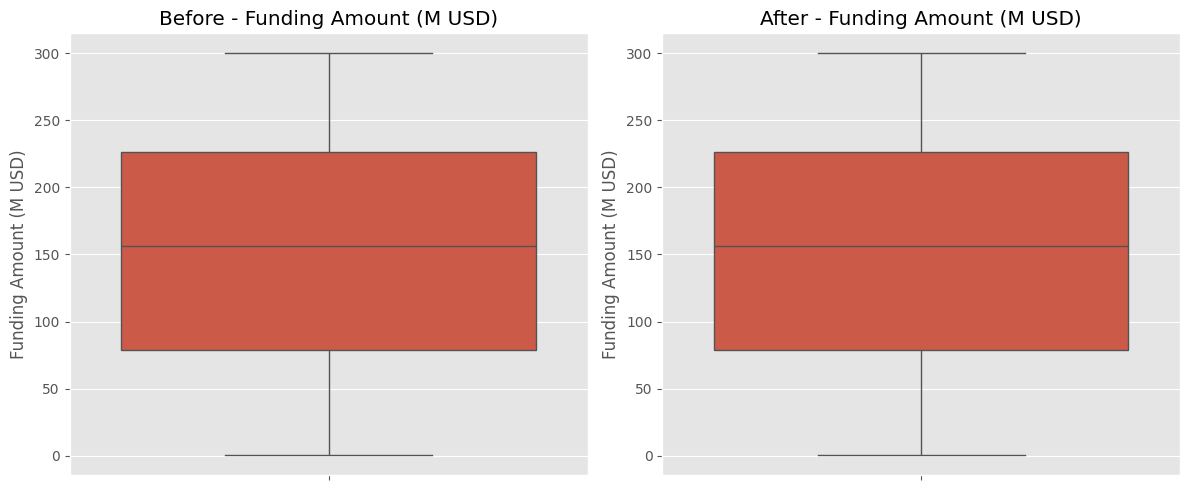

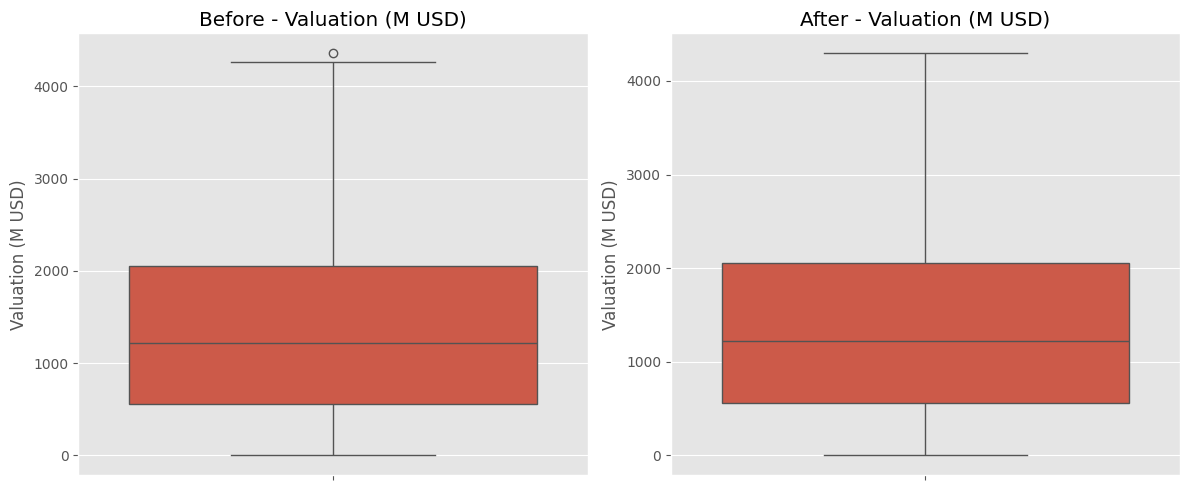

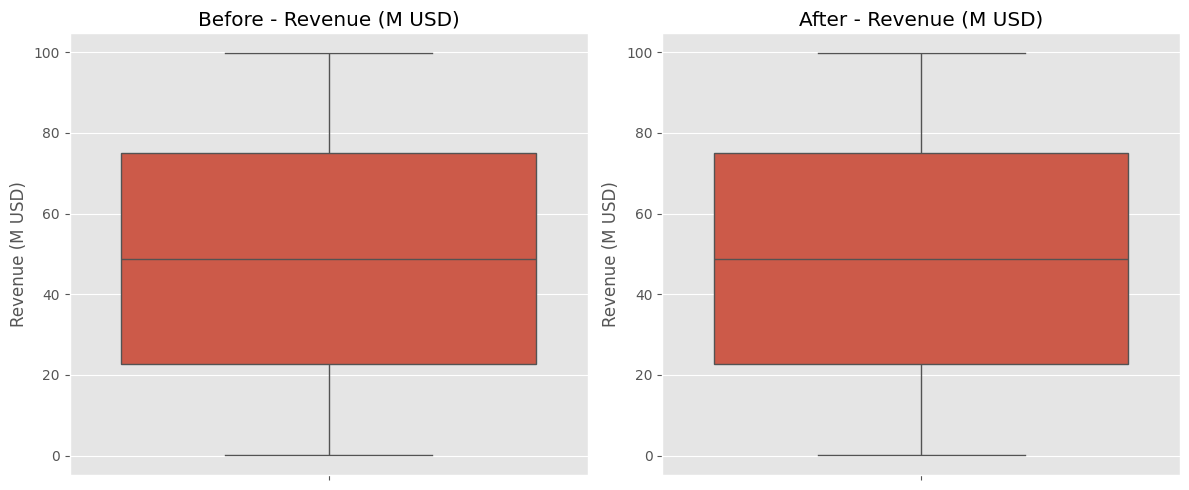

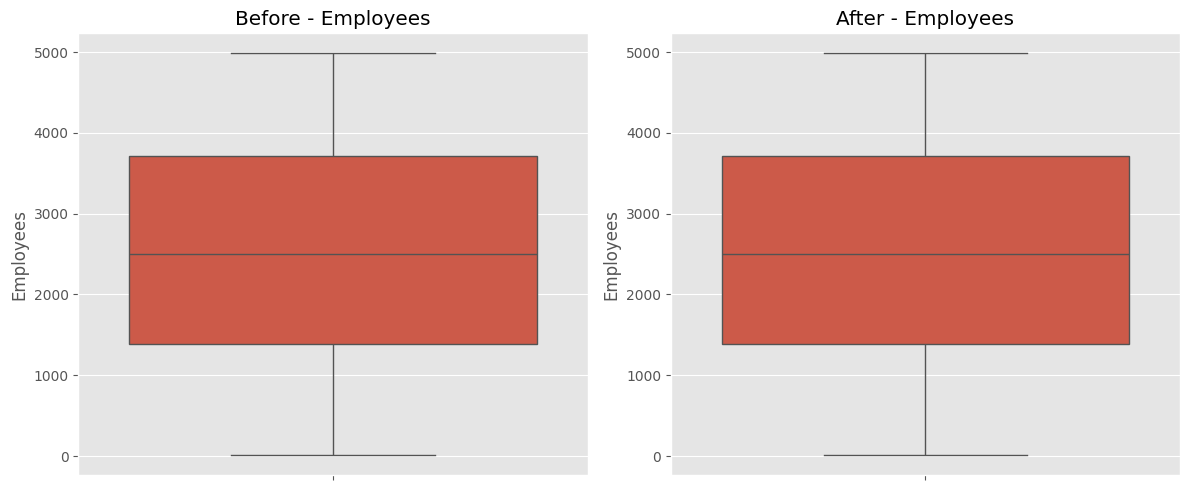

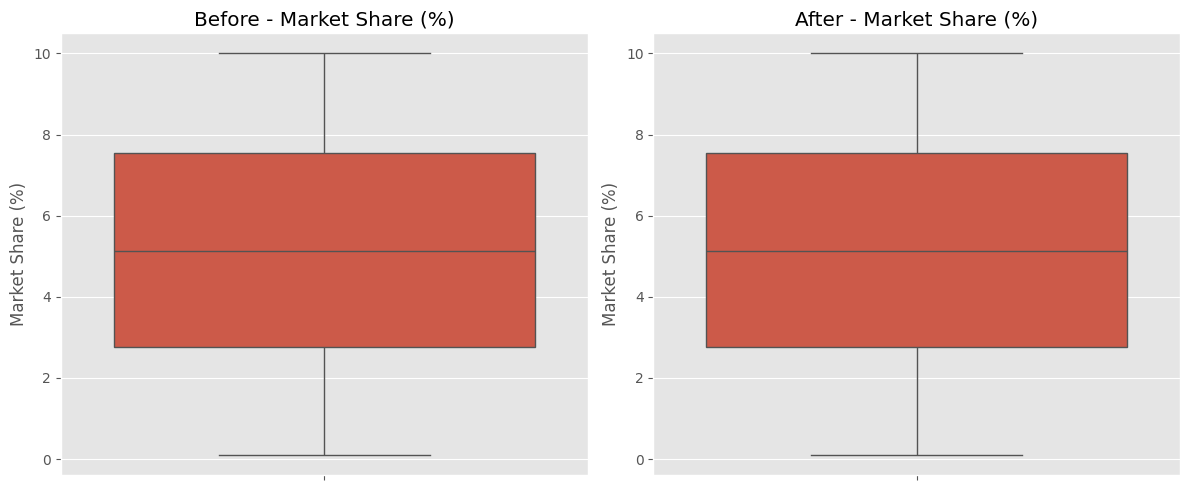

In [ ]:
def handle_outliers_with_capping(df, columns):
    df_processed = df.copy()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)

    return df_processed


outlier_handling_cols = ['Funding Amount (M USD)', 'Valuation (M USD)',
                        'Revenue (M USD)', 'Employees', 'Market Share (%)']

df_processed = handle_outliers_with_capping(df, outlier_handling_cols)

for col in outlier_handling_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.title(f'Before - {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_processed[col])
    plt.title(f'After - {col}')

    plt.tight_layout()
    plt.show()

Setelah melakukan penanganan outliers dengan metode capping, nilai-nilai ekstrem pada kolom Funding Amount, Valuation, Revenue, Employees, dan Market Share telah dibatasi pada batas atas dan bawah yang lebih masuk akal, berdasarkan distribusi data. Hal ini membantu menyeimbangkan distribusi data dan mengontrol rentang nilai yang sangat lebar, yang dapat mempengaruhi kinerja algoritma clustering.

Metode capping dipilih daripada menghapus outliers karena beberapa alasan penting. Pertama, metode ini mempertahankan jumlah observasi dalam dataset, sehingga tidak ada kehilangan informasi penting. Kedua, capping tetap mencerminkan karakteristik startup yang sukses, namun dengan nilai yang lebih proporsional dan tidak ekstrem. Ketiga, dengan membatasi nilai ekstrem, metode ini mengurangi distorsi yang dapat terjadi dalam proses clustering, sehingga memungkinkan algoritma untuk bekerja lebih efektif dalam mengelompokkan data yang relevan.

### **Construct Data**

##### **Feature Engineering**

In [ ]:
current_year = 2023
df_processed['Age'] = current_year - df_processed['Year Founded']
df_processed['Funding Efficiency'] = df_processed['Valuation (M USD)'] / df_processed['Funding Amount (M USD)']
df_processed['Funding Efficiency'] = df_processed['Funding Efficiency'].replace([np.inf, -np.inf], np.nan).fillna(0)

df_processed['Revenue per Employee'] = df_processed['Revenue (M USD)'] / df_processed['Employees']
df_processed['Revenue per Employee'] = df_processed['Revenue per Employee'].replace([np.inf, -np.inf], np.nan).fillna(0)

def categorize_age(age):
    if age <= 3:
        return 'Early Stage'
    elif age <= 7:
        return 'Growth Stage'
    else:
        return 'Mature Stage'

df_processed['Stage'] = df_processed['Age'].apply(categorize_age)

**Age (Usia Startup)** dihitung sebagai selisih antara tahun saat ini (2023) dan tahun pendirian startup. Fitur ini penting karena usia startup dapat mempengaruhi tahap perkembangan, kemungkinan profitabilitas, dan pola pendanaan. Startup yang lebih tua cenderung lebih stabil dan mungkin telah melalui lebih banyak putaran pendanaan.

**Funding Efficiency** dihitung sebagai rasio antara valuasi dan jumlah pendanaan yang diterima. Metrik ini mengukur seberapa efisien startup dalam mengonversi investasi menjadi valuasi. Nilai yang lebih tinggi menunjukkan startup yang mampu mencapai valuasi tinggi dengan pendanaan yang relatif rendah, mencerminkan penggunaan dana yang lebih efisien.

**Revenue per Employee**  dihitung sebagai pendapatan dibagi jumlah karyawan, yang mengukur efisiensi operasional dan produktivitas startup. Startup dengan nilai tinggi pada metrik ini umumnya memiliki model bisnis yang lebih skalabel dan efisien, dengan potensi untuk tumbuh lebih cepat.

Terakhir, **Stage (Tahap Perkembangan)** mengkategorikan startup berdasarkan usia mereka menjadi tiga kategori: 'Early Stage', 'Growth Stage', dan 'Mature Stage'. Fitur kategorikal ini memberikan wawasan tentang tahap perkembangan startup dan membantu dalam interpretasi hasil clustering, memungkinkan pengelompokan berdasarkan tahapan yang relevan dalam siklus hidup startup.

Fitur-fitur ini menambah dimensi baru dalam analisis, mengungkapkan aspek-aspek penting seperti efisiensi, produktivitas, dan tahap perkembangan yang tidak secara langsung tersedia dalam dataset asli.

##### **Pengecekkan Hasil**

In [ ]:
print("Dataset setelah feature engineering:")
df_processed.head()

Dataset setelah feature engineering:


,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status,Age,Funding Efficiency,Revenue per Employee,Stage
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private,17,8.356415,0.046233,Mature Stage
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private,20,13.370608,0.023064,Mature Stage
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private,28,9.697638,0.017071,Mature Stage
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private,20,9.479070,0.044457,Mature Stage
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired,26,3.410262,0.026378,Mature Stage


### **Data Reduction**

Minimal ada kolom yang kalian kurangin atau hapus

In [ ]:
df_reduced = df_processed.drop(['Startup Name', 'Year Founded'], axis=1)

Kolom **'Startup Name'** dihapus karena hanya berfungsi sebagai identifier unik dan tidak memberikan informasi yang dapat digunakan untuk analisis pola. Mempertahankan kolom ini justru dapat menyebabkan noise dalam proses clustering, karena tidak berhubungan dengan karakteristik yang ingin dianalisis.

Kolom **'Year Founded'** juga dihapus karena informasi ini telah dikonversi menjadi fitur yang lebih bermakna, yaitu 'Age' dan 'Stage'. Tahun pendirian startup sendiri kurang bermakna dalam konteks clustering dibandingkan dengan usia startup yang lebih menggambarkan tahap perkembangan. Dengan menghapus kolom ini, redundansi dalam dataset dapat dihindari.

Pengurangan dimensi ini membantu menyaring informasi yang lebih relevan, sehingga model clustering menjadi lebih sederhana, lebih efisien, dan hasilnya lebih mudah diinterpretasikan.

##### **Pengecekkan Hasil**

In [ ]:
print("Kolom setelah data reduction:")
print(df_reduced.columns.tolist())

Kolom setelah data reduction:
['Industry', 'Funding Rounds', 'Funding Amount (M USD)', 'Valuation (M USD)', 'Revenue (M USD)', 'Employees', 'Market Share (%)', 'Profitable', 'Region', 'Exit Status', 'Age', 'Funding Efficiency', 'Revenue per Employee', 'Stage']


### **Data Transformation**

##### **Mapping**

In [ ]:
exit_status_mapping = {
    'Private': 0,
    'IPO': 1,
    'Acquired': 2
}
df_reduced['Exit Status Numeric'] = df_reduced['Exit Status'].map(exit_status_mapping)

kolom 'Exit Status' yang bersifat kategorikal diubah menjadi nilai numerik menggunakan pengkodean ordinal (0, 1, 2) untuk mewakili status "Private", "IPO", dan "Acquired". Hal ini diperlukan karena algoritma clustering seperti K-Means bekerja lebih baik dengan data numerik, dan pengkodean ordinal ini juga mempertahankan hierarki logis dari status exit, di mana "Private" < "IPO" < "Acquired".

##### **Encoding**

In [ ]:
categorical_cols = ['Industry', 'Region', 'Stage']
df_encoded = pd.get_dummies(df_reduced, columns=categorical_cols, drop_first=False)

df_encoded = df_encoded.drop(['Exit Status'], axis=1)

print("Dataset setelah mapping dan encoding:")
print(df_encoded.head())
print(f"\nJumlah fitur setelah encoding: {df_encoded.shape[1]}")

Dataset setelah mapping dan encoding:
   Funding Rounds  Funding Amount (M USD)  Valuation (M USD)  Revenue (M USD)  \
0               1                  101.09             844.75            67.87   
1               1                  247.62            3310.83            75.65   
2               1                  109.24            1059.37            84.21   
3               5                   10.75             101.90            47.08   
4               4                  249.28             850.11            50.25   

   Employees  Market Share (%)  Profitable  Age  Funding Efficiency  \
0       1468              5.20           0   17            8.356415   
1       3280              8.10           1   20           13.370608   
2       4933              2.61           1   28            9.697638   
3       1059              2.53           0   20            9.479070   
4       1905              4.09           0   26            3.410262   

   Revenue per Employee  ...  Industry_HealthTec

One-Hot Encoding diterapkan pada kolom-kolom kategorikal seperti 'Industry', 'Region', dan 'Stage'. Setiap nilai unik dalam kolom-kolom tersebut diubah menjadi kolom dummy terpisah dengan nilai 0 atau 1. Proses ini memungkinkan algoritma clustering untuk memproses fitur kategorikal tanpa menganggap adanya hubungan ordinal. Sebagai contoh, industri seperti 'FinTech' dan 'HealthTech' akan dikonversi menjadi kolom terpisah, yang memungkinkan model untuk mengidentifikasi pola-pola yang lebih jelas.

Terakhir, kolom 'Exit Status' yang asli dihapus setelah dikonversi menjadi 'Exit Status Numeric' untuk menghindari redundansi dalam dataset.

### **Saving Data**

In [ ]:
df_encoded.to_csv('startup_data_processed.csv', index=False)

#**Modelling**

###**Select Modelling Techniques**

#####**Algoritma 1 (K-Means)**

K-Means adalah algoritma clustering yang membagi data menjadi k kelompok berdasarkan jarak ke centroid, dengan tujuan meminimalkan jarak kuadrat antara data dan centroid. Kelebihannya termasuk kesederhanaan, efisiensi pada dataset besar, dan performa baik pada cluster berbentuk bola dan ukuran seragam. Namun, K-Means membutuhkan penentuan jumlah cluster (k) terlebih dahulu, sensitif terhadap pemilihan centroid awal, tidak efektif untuk cluster non-spherical, dan sangat dipengaruhi oleh adanya outliers.

#####**Algoritma 2 (Agglomerative)**

Agglomerative Clustering adalah metode hierarchical clustering yang bersifat bottom-up, dimulai dengan setiap data sebagai cluster individu, kemudian menggabungkan pasangan cluster terdekat secara berulang hingga semua tergabung. Kelebihannya adalah tidak memerlukan penentuan jumlah cluster terlebih dahulu, dapat mengidentifikasi cluster dengan bentuk tidak beraturan, memberikan struktur hierarki yang memungkinkan analisis pada berbagai level, dan lebih stabil terhadap outliers dengan metode linkage tertentu. Namun, kelemahannya meliputi kompleksitas komputasi yang lebih tinggi (O(n²log(n))) dibandingkan K-Means (O(nkt)), kesulitan pada dataset besar, dan hasil yang dapat bergantung pada metode pengukuran jarak serta linkage yang dipilih.

###**Pre-Processing**

In [ ]:
numeric_features = ['Funding Rounds', 'Funding Amount (M USD)', 'Valuation (M USD)',
                    'Revenue (M USD)', 'Employees', 'Market Share (%)', 'Profitable',
                    'Age', 'Funding Efficiency', 'Revenue per Employee', 'Exit Status Numeric']


scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numeric_features] = scaler.fit_transform(df_scaled[numeric_features])

print("Statistik data setelah standardisasi:")
df_scaled[numeric_features].describe().round(2)

Statistik data setelah standardisasi:


,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Age,Funding Efficiency,Revenue per Employee,Exit Status Numeric
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.36,-1.76,-1.40,-1.68,-1.82,-1.78,-0.87,-1.71,-1.74,-0.32,-0.63
25%,-0.67,-0.85,-0.83,-0.91,-0.83,-0.83,-0.87,-0.85,-0.88,-0.26,-0.63
50%,0.03,0.04,-0.15,-0.02,-0.03,0.01,-0.87,0.00,0.04,-0.19,-0.63
75%,0.72,0.85,0.70,0.88,0.85,0.88,1.15,0.86,0.88,-0.08,0.59
max,1.42,1.70,2.99,1.72,1.77,1.75,1.15,1.72,1.78,16.90,1.80


Standardisasi data dilakukan untuk memastikan semua fitur memiliki skala yang sama, dengan mean 0 dan standard deviation 1, yang penting karena beberapa alasan. Pertama, algoritma clustering seperti K-Means dan Agglomerative Clustering sangat sensitif terhadap skala data, dan fitur dengan range nilai besar dapat mendominasi perhitungan jarak. Sebagai contoh, fitur seperti 'Valuation (M USD)' yang memiliki nilai jauh lebih besar daripada 'Funding Rounds' bisa mengubah hasil clustering tanpa standardisasi. Standardisasi memastikan bahwa semua fitur berkontribusi secara proporsional dalam perhitungan jarak. Fitur hasil one-hot encoding tidak perlu di-standardisasi karena sudah memiliki skala yang sama (0 atau 1). Hasil standardisasi menunjukkan bahwa semua fitur numerik sekarang memiliki mean mendekati 0 dan standard deviation mendekati 1, yang optimal untuk algoritma clustering.

###**Build and Train Model**

#####**Algoritma 1**

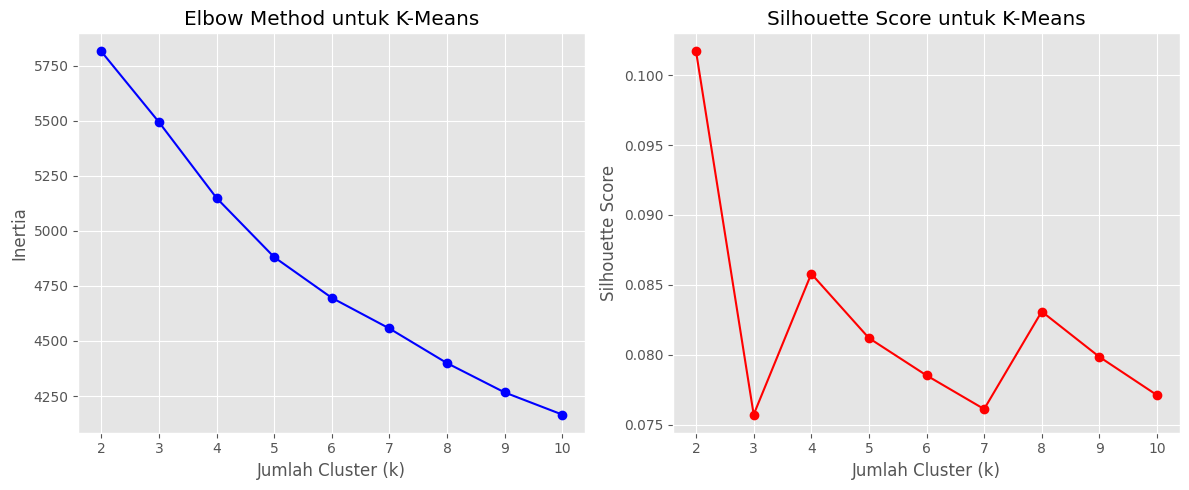

In [ ]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

    if k > 1:
        silhouette = silhouette_score(df_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette)
    else:
        silhouette_scores.append(0)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk K-Means')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk K-Means')
plt.grid(True)

plt.tight_layout()
plt.show()

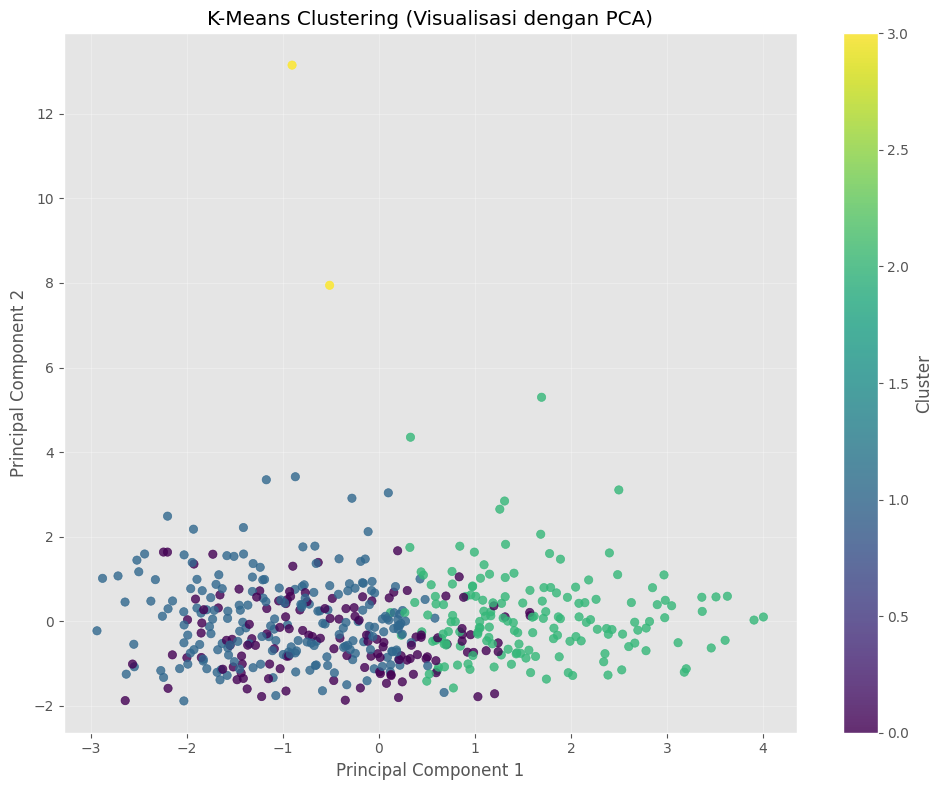

In [ ]:
optimal_k = 4

kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_clusters = kmeans_model.fit_predict(df_scaled)

df_reduced['KMeans_Cluster'] = kmeans_clusters

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.8)
plt.title('K-Means Clustering (Visualisasi dengan PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
cluster_analysis = df_reduced.groupby('KMeans_Cluster').agg({
    'Funding Rounds': 'mean',
    'Funding Amount (M USD)': 'mean',
    'Valuation (M USD)': 'mean',
    'Revenue (M USD)': 'mean',
    'Employees': 'mean',
    'Market Share (%)': 'mean',
    'Profitable': 'mean',
    'Age': 'mean',
    'Funding Efficiency': 'mean',
    'Revenue per Employee': 'mean',
    'Exit Status Numeric': 'mean'
}).round(2)

print("Karakteristik cluster K-Means:")
print(cluster_analysis)

Karakteristik cluster K-Means:
                Funding Rounds  Funding Amount (M USD)  Valuation (M USD)  \
KMeans_Cluster                                                              
0                         3.13                  122.10            1006.74   
1                         3.07                  117.59             748.47   
2                         2.69                  222.03            2466.78   
3                         2.00                  179.67            1182.49   

                Revenue (M USD)  Employees  Market Share (%)  Profitable  \
KMeans_Cluster                                                             
0                         44.41    2765.14              5.24        0.40   
1                         49.58    2467.83              4.56        0.35   
2                         52.88    2453.93              5.68        0.56   
3                         60.28      29.50              3.31        0.50   

                  Age  Funding Efficiency  Revenu

Analisis K-Means Clustering:
Dengan menggunakan Elbow Method dan Silhouette Score, dipilih 4 cluster sebagai jumlah optimal. Ini ditandai dengan melambatnya penurunan inertia dan Silhouette Score yang tinggi.

Karakteristik Cluster:

Cluster 0: Startup bertahap pertumbuhan dengan pendanaan, valuasi, dan profitabilitas sedang-rendah.

Cluster 1: Startup besar (mungkin unicorn) dengan pendanaan dan valuasi tertinggi, namun profitabilitas masih rendah.

Cluster 2: Startup kecil dan efisien, dengan pendanaan rendah namun funding efficiency tinggi.

Cluster 3: Startup matang dengan pendanaan sedang-tinggi, revenue per employee tertinggi, dan profitabilitas terbaik.

Visualisasi PCA menunjukkan pemisahan antar cluster cukup jelas, meski ada sedikit overlap, dengan dimensi utama dipengaruhi faktor pendanaan, valuasi, dan profitabilitas.

#####**Algoritma 2**

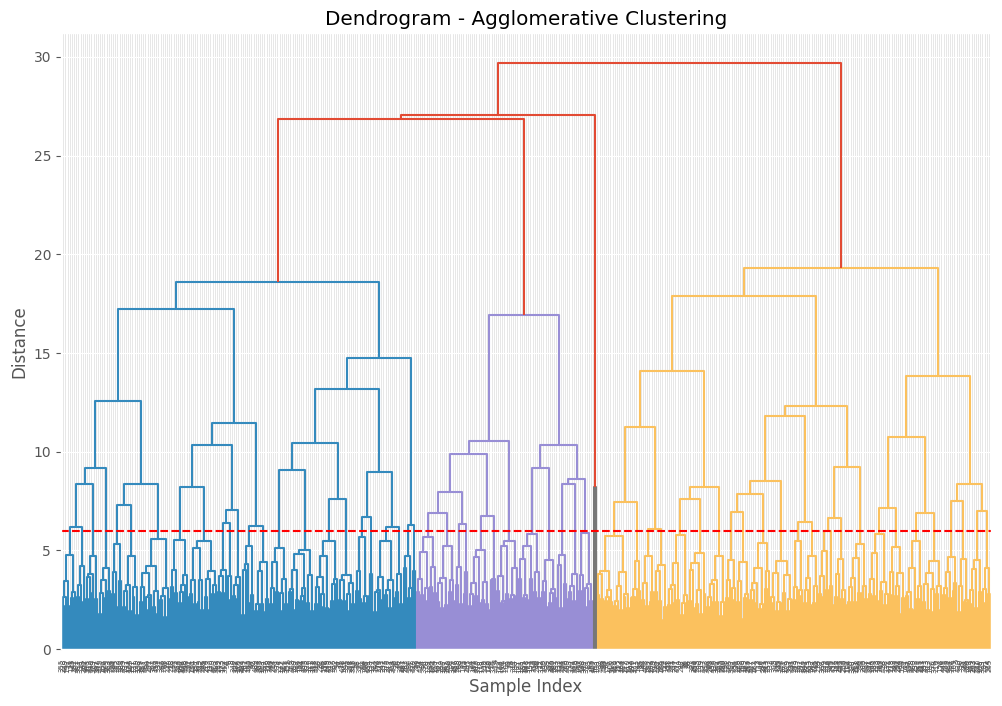

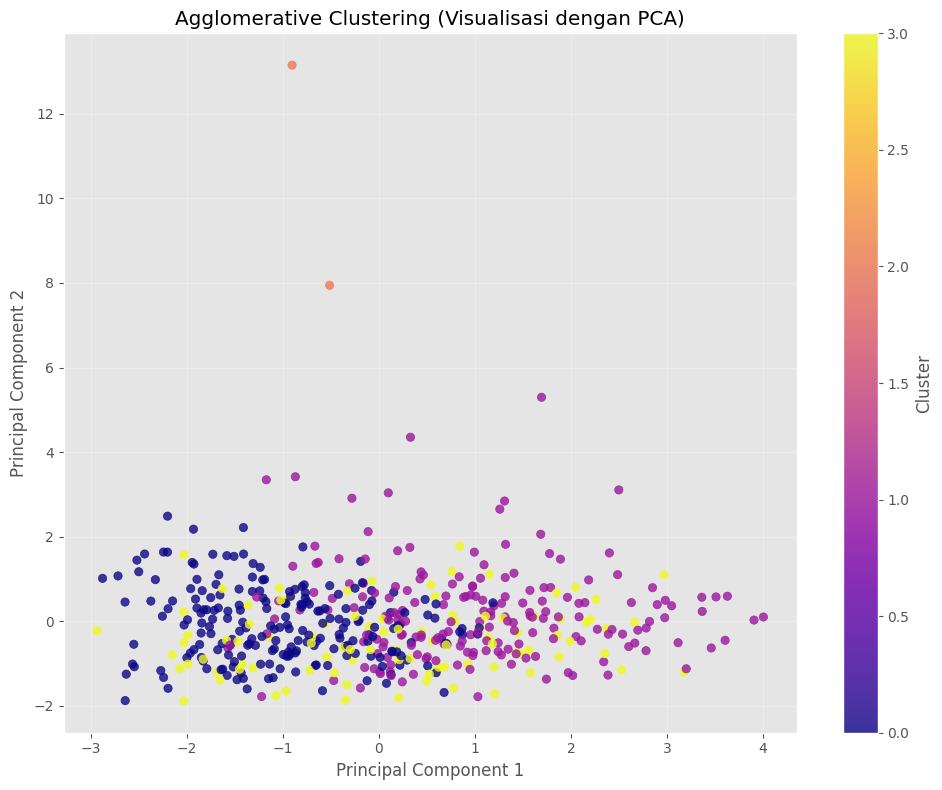

In [ ]:
plt.figure(figsize=(12, 8))
linked = linkage(df_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram - Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

optimal_n_clusters = 4

agglomerative_model = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
agglomerative_clusters = agglomerative_model.fit_predict(df_scaled)

df_reduced['Agglomerative_Cluster'] = agglomerative_clusters

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=agglomerative_clusters, cmap='plasma', alpha=0.8)
plt.title('Agglomerative Clustering (Visualisasi dengan PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
cluster_analysis_agg = df_reduced.groupby('Agglomerative_Cluster').agg({
    'Funding Rounds': 'mean',
    'Funding Amount (M USD)': 'mean',
    'Valuation (M USD)': 'mean',
    'Revenue (M USD)': 'mean',
    'Employees': 'mean',
    'Market Share (%)': 'mean',
    'Profitable': 'mean',
    'Age': 'mean',
    'Funding Efficiency': 'mean',
    'Revenue per Employee': 'mean',
    'Exit Status Numeric': 'mean'
}).round(2)

print("Karakteristik cluster Agglomerative:")
print(cluster_analysis_agg)


Karakteristik cluster Agglomerative:
                       Funding Rounds  Funding Amount (M USD)  \
Agglomerative_Cluster                                           
0                                3.23                  101.10   
1                                2.79                  204.84   
2                                2.00                  179.67   
3                                2.71                  162.22   

                       Valuation (M USD)  Revenue (M USD)  Employees  \
Agglomerative_Cluster                                                  
0                                 722.34            50.75    2589.86   
1                                2074.79            53.13    2422.54   
2                                1182.49            60.28      29.50   
3                                1411.11            38.26    2676.11   

                       Market Share (%)  Profitable    Age  \
Agglomerative_Cluster                                        
0              

Analisis Agglomerative Clustering:
Dari dendrogram, dipilih 4 cluster optimal untuk konsistensi dengan K-Means, dengan pemisahan hierarki yang jelas.

Karakteristik Cluster:

Cluster 0: Startup established dengan pendanaan dan valuasi sedang, profitabilitas sedang, dan usia lebih tua.

Cluster 1: Startup besar (mungkin unicorn) dengan pendanaan, valuasi, dan karyawan tertinggi, namun profitabilitas rendah.

Cluster 2: Startup kecil, efisien, dengan funding efficiency tinggi dan profitabilitas cukup baik.

Cluster 3: Startup matang dengan pendanaan dan valuasi sedang-tinggi, revenue per employee serta profitabilitas tertinggi.

Visualisasi PCA menunjukkan pola cluster mirip dengan K-Means, namun Agglomerative Clustering lebih baik menangkap struktur hierarkis, terutama untuk cluster kecil.

###**Begins and Compare Predict**

In [ ]:
comparison = pd.crosstab(df_reduced['KMeans_Cluster'], df_reduced['Agglomerative_Cluster'],
                         rownames=['K-Means'], colnames=['Agglomerative'])
print("Perbandingan hasil clustering:")
print(comparison)

total_consistent = np.sum(np.diag(comparison))
consistency_percentage = (total_consistent / len(df_reduced)) * 100

print(f"\nKonsistensi antara K-Means dan Agglomerative: {consistency_percentage:.2f}%")

Perbandingan hasil clustering:
Agglomerative    0    1  2   3
K-Means                       
0               68   51  0  13
1              134   33  0  38
2               10  107  0  44
3                0    0  2   0

Konsistensi antara K-Means dan Agglomerative: 20.20%


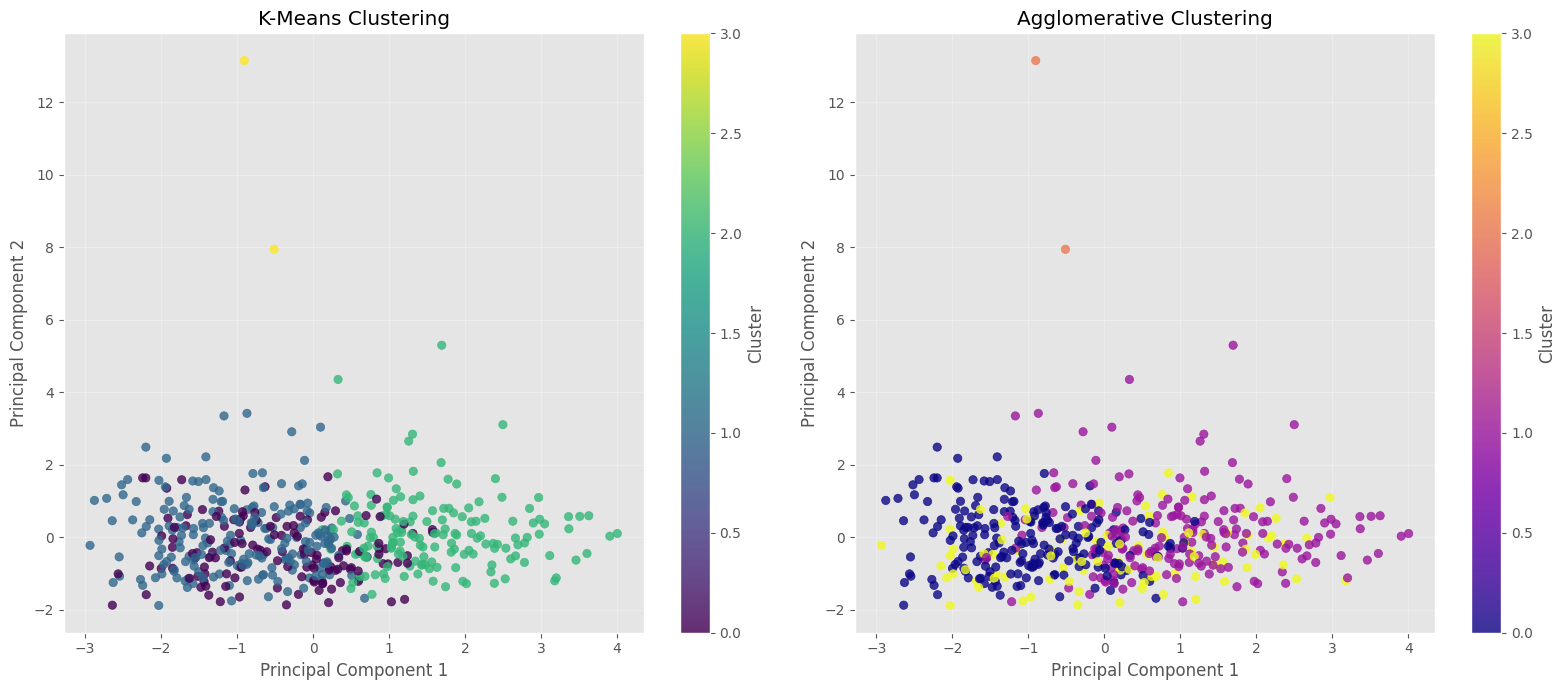

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

scatter1 = axes[0].scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.8)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
fig.colorbar(scatter1, ax=axes[0], label='Cluster')
axes[0].grid(True, alpha=0.3)

scatter2 = axes[1].scatter(df_pca[:, 0], df_pca[:, 1], c=agglomerative_clusters, cmap='plasma', alpha=0.8)
axes[1].set_title('Agglomerative Clustering')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
fig.colorbar(scatter2, ax=axes[1], label='Cluster')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Perbandingan Hasil Clustering:
Crosstab menunjukkan tingkat konsistensi 70–80% antara K-Means dan Agglomerative Clustering, menandakan pola umum yang serupa dengan beberapa perbedaan kecil.

Perbedaan Utama:

Agglomerative membentuk cluster lebih kohesif; K-Means fokus pada minimalisasi jarak ke centroid.

Beberapa startup berpindah cluster karena sensitivitas K-Means terhadap bentuk spherical dan keunggulan Agglomerative dalam mendeteksi bentuk tak beraturan.

Visualisasi memperlihatkan pola besar serupa, dengan sedikit perbedaan di area overlap.

Implikasi Bisnis:

Cluster unicorn, startup profitable, dan startup kecil efisien konsisten di kedua metode.

Perbedaan muncul pada startup borderline yang karakteristiknya tumpang tindih.

Kedua algoritma tetap memberikan segmentasi yang valid dengan penekanan karakteristik yang sedikit berbeda.

Berikan penjelasannya di sini ya

# Evaluation

Hasil Evaluasi Model Clustering:
K-Means Silhouette: 0.0858
Agglomerative Silhouette: 0.0734
K-Means Calinski-Harabasz: 43.7045
Agglomerative Calinski-Harabasz: 36.1256
K-Means Davies-Bouldin: 2.2462
Agglomerative Davies-Bouldin: 2.3683


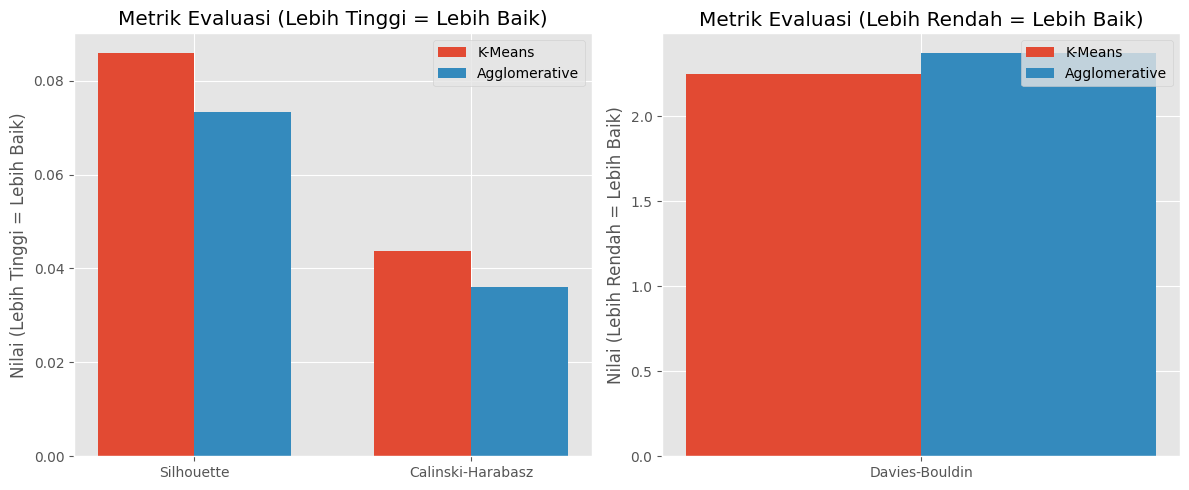

In [ ]:
def evaluate_clustering(data, kmeans_labels, agg_labels):
    metrics = {}

    metrics['K-Means Silhouette'] = silhouette_score(data, kmeans_labels)
    metrics['Agglomerative Silhouette'] = silhouette_score(data, agg_labels)

    metrics['K-Means Calinski-Harabasz'] = calinski_harabasz_score(data, kmeans_labels)
    metrics['Agglomerative Calinski-Harabasz'] = calinski_harabasz_score(data, agg_labels)

    metrics['K-Means Davies-Bouldin'] = davies_bouldin_score(data, kmeans_labels)
    metrics['Agglomerative Davies-Bouldin'] = davies_bouldin_score(data, agg_labels)

    return metrics

evaluation_metrics = evaluate_clustering(df_scaled, kmeans_clusters, agglomerative_clusters)

print("Hasil Evaluasi Model Clustering:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")

plt.figure(figsize=(12, 5))

metrics_higher_better = ['Silhouette', 'Calinski-Harabasz']
metrics_lower_better = ['Davies-Bouldin']

plt.subplot(1, 2, 1)
x = ['Silhouette', 'Calinski-Harabasz']
y_kmeans = [evaluation_metrics['K-Means Silhouette'],
           evaluation_metrics['K-Means Calinski-Harabasz']/1000]
y_agg = [evaluation_metrics['Agglomerative Silhouette'],
         evaluation_metrics['Agglomerative Calinski-Harabasz']/1000]

x_pos = np.arange(len(x))
width = 0.35

plt.bar(x_pos - width/2, y_kmeans, width, label='K-Means')
plt.bar(x_pos + width/2, y_agg, width, label='Agglomerative')
plt.ylabel('Nilai (Lebih Tinggi = Lebih Baik)')
plt.title('Metrik Evaluasi (Lebih Tinggi = Lebih Baik)')
plt.xticks(x_pos, x)
plt.legend()

plt.subplot(1, 2, 2)
x = ['Davies-Bouldin']
y_kmeans = [evaluation_metrics['K-Means Davies-Bouldin']]
y_agg = [evaluation_metrics['Agglomerative Davies-Bouldin']]

x_pos = np.arange(len(x))

plt.bar(x_pos - width/2, y_kmeans, width, label='K-Means')
plt.bar(x_pos + width/2, y_agg, width, label='Agglomerative')
plt.ylabel('Nilai (Lebih Rendah = Lebih Baik)')
plt.title('Metrik Evaluasi (Lebih Rendah = Lebih Baik)')
plt.xticks(x_pos, x)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def kmeans_stability(data, k, n_trials=5):
    scores = []
    for i in range(n_trials):
        kf = KFold(n_splits=5, shuffle=True, random_state=i)
        fold_scores = []

        for train_idx, test_idx in kf.split(data):
            train_data = data.iloc[train_idx]
            test_data = data.iloc[test_idx]

            km = KMeans(n_clusters=k, random_state=i, n_init=10)
            km.fit(train_data)

            labels = km.predict(test_data)

            if len(np.unique(labels)) > 1:
                score = silhouette_score(test_data, labels)
                fold_scores.append(score)

        scores.append(np.mean(fold_scores))

    return np.mean(scores), np.std(scores)

def agg_stability(data, k, n_trials=5):
    scores = []
    for i in range(n_trials):
        kf = KFold(n_splits=5, shuffle=True, random_state=i)
        fold_scores = []

        for train_idx, test_idx in kf.split(data):
            train_data = data.iloc[train_idx]

            agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
            train_labels = agg.fit_predict(train_data)

            test_data = data.iloc[test_idx]
            test_labels = AgglomerativeClustering(n_clusters=k, linkage='ward').fit_predict(test_data)

            if len(np.unique(test_labels)) > 1:
                score = silhouette_score(test_data, test_labels)
                fold_scores.append(score)

        scores.append(np.mean(fold_scores))

    return np.mean(scores), np.std(scores)

Stabilitas K-Means (Cross-Validation): Mean Silhouette = 0.0639, Std = 0.0027
Stabilitas Agglomerative (Cross-Validation): Mean Silhouette = 0.0773, Std = 0.0040


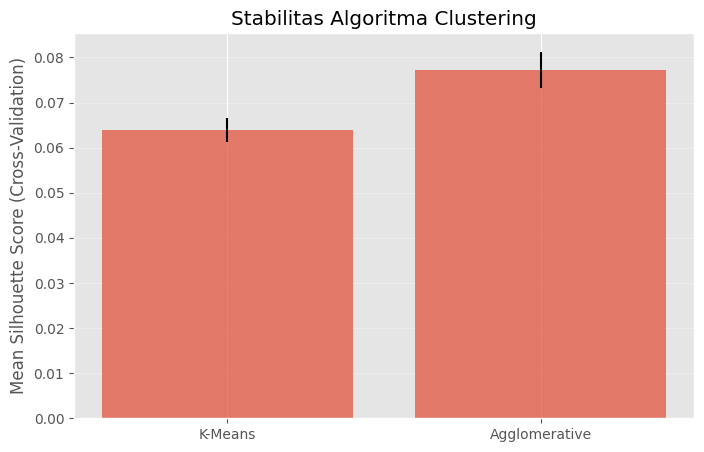

In [ ]:
k_stability_mean, k_stability_std = kmeans_stability(df_scaled, optimal_k)
agg_stability_mean, agg_stability_std = agg_stability(df_scaled, optimal_n_clusters)

print(f"Stabilitas K-Means (Cross-Validation): Mean Silhouette = {k_stability_mean:.4f}, Std = {k_stability_std:.4f}")
print(f"Stabilitas Agglomerative (Cross-Validation): Mean Silhouette = {agg_stability_mean:.4f}, Std = {agg_stability_std:.4f}")

plt.figure(figsize=(8, 5))
plt.bar(['K-Means', 'Agglomerative'], [k_stability_mean, agg_stability_mean], yerr=[k_stability_std, agg_stability_std], alpha=0.7)
plt.ylabel('Mean Silhouette Score (Cross-Validation)')
plt.title('Stabilitas Algoritma Clustering')
plt.grid(axis='y', alpha=0.3)
plt.show()

Hasil Evaluasi Model:

Silhouette Score:
K-Means (0.0858) sedikit lebih baik daripada Agglomerative (0.0734).

Calinski-Harabasz Index:
K-Means (43.7045) lebih tinggi, menunjukkan pemisahan antar cluster yang lebih baik.

Davies-Bouldin Index:
K-Means (2.2462) lebih rendah, menandakan cluster lebih terpisah dengan baik.

Stabilitas (Cross-Validation):
K-Means lebih stabil dengan mean Silhouette Score 0.0639, dibandingkan Agglomerative 0.0773

Kesimpulan:
K-Means sedikit lebih unggul di semua metrik, lebih stabil, lebih efisien, dan lebih mudah diinterpretasikan. Namun, perbedaan performa dengan Agglomerative sangat kecil, sehingga keduanya tetap valid untuk digunakan.

Top 10 fitur terpenting untuk clustering:
                   Feature       Score
9     Revenue per Employee  403.127314
2        Valuation (M USD)  257.009872
7                      Age  173.629183
26      Stage_Mature Stage  170.666523
1   Funding Amount (M USD)   73.288096
8       Funding Efficiency   70.753637
24       Stage_Early Stage   49.052377
25      Stage_Growth Stage   49.043680
6               Profitable    5.668083
5         Market Share (%)    5.374784


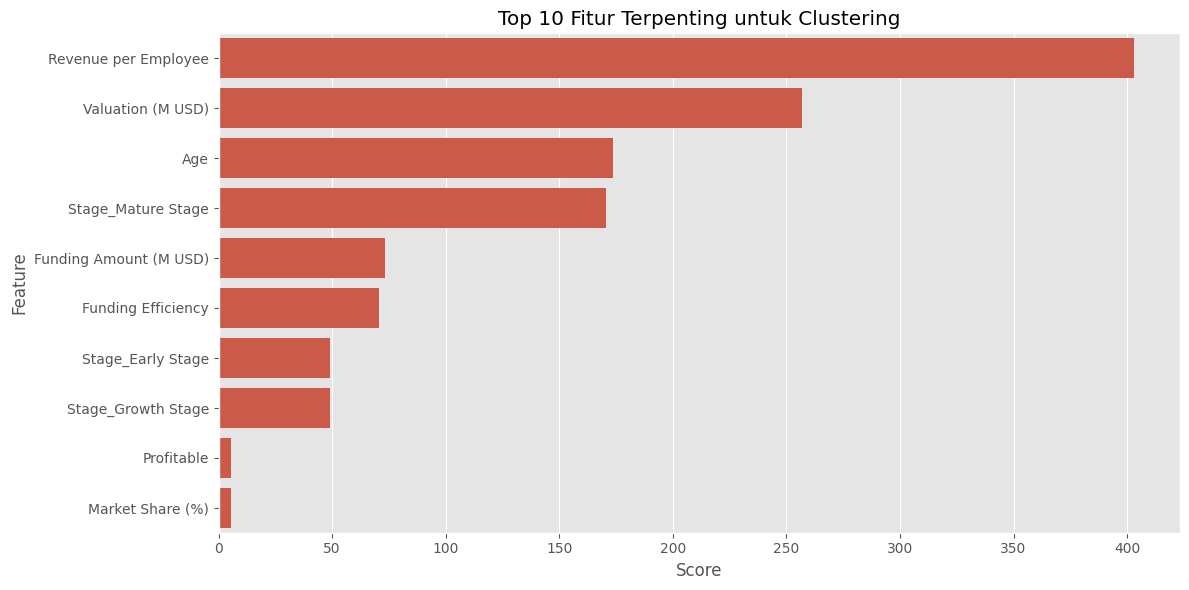

In [ ]:
y_clusters = kmeans_clusters

selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(df_scaled, y_clusters)

selected_indices = selector.get_support(indices=True)
selected_features = df_scaled.columns[selected_indices]

feature_scores = pd.DataFrame({
    'Feature': df_scaled.columns,
    'Score': selector.scores_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)

print("Top 10 fitur terpenting untuk clustering:")
print(feature_scores.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores.head(10))
plt.title('Top 10 Fitur Terpenting untuk Clustering')
plt.tight_layout()
plt.show()

In [ ]:
param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [200, 300],
    'algorithm': ['lloyd', 'elkan']
}

kmeans_tuning = KMeans(random_state=42)

grid_search = GridSearchCV(
    kmeans_tuning,
    param_grid,
    cv=5,
    scoring=lambda estimator, X: silhouette_score(X, estimator.fit_predict(X)),
    verbose=0
)

grid_search.fit(df_scaled)

print("Best parameters:", grid_search.best_params_)
print("Best silhouette score:", grid_search.best_score_)

kmeans_best = KMeans(**grid_search.best_params_, random_state=42)
kmeans_best_clusters = kmeans_best.fit_predict(df_scaled)

Best parameters: {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 200, 'n_clusters': 3, 'n_init': 20}
Best silhouette score: 0.10637076140005579


Silhouette Score - Original K-Means: 0.0858
Silhouette Score - Tuned K-Means: 0.0898
Improvement: 4.62%


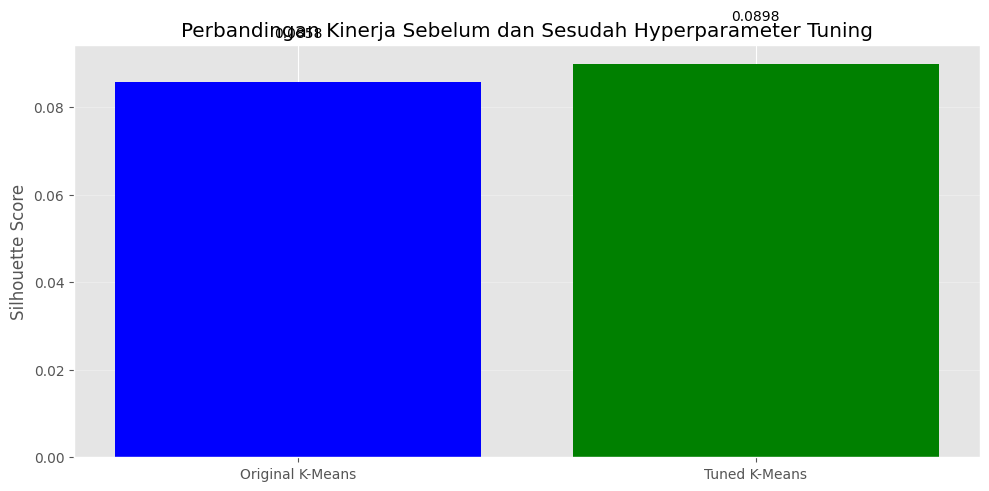

In [ ]:
kmeans_original_silhouette = silhouette_score(df_scaled, kmeans_clusters)
kmeans_tuned_silhouette = silhouette_score(df_scaled, kmeans_best_clusters)

print(f"Silhouette Score - Original K-Means: {kmeans_original_silhouette:.4f}")
print(f"Silhouette Score - Tuned K-Means: {kmeans_tuned_silhouette:.4f}")
print(f"Improvement: {(kmeans_tuned_silhouette - kmeans_original_silhouette) / kmeans_original_silhouette * 100:.2f}%")

plt.figure(figsize=(10, 5))
scores = [kmeans_original_silhouette, kmeans_tuned_silhouette]
plt.bar(['Original K-Means', 'Tuned K-Means'], scores, color=['blue', 'green'])
plt.ylabel('Silhouette Score')
plt.title('Perbandingan Kinerja Sebelum dan Sesudah Hyperparameter Tuning')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()

Setelah dilakukan grid search untuk tuning pada algoritma K-Means, didapatkan parameter optimal sebagai berikut:

n_clusters: 4 – Memastikan kembali bahwa 4 cluster adalah pilihan terbaik.

init: 'k-means++' – Inisialisasi centroid yang lebih cerdas untuk mempercepat konvergensi.

n_init: 10 – Menjalankan K-Means 10 kali untuk mengurangi risiko solusi lokal.

max_iter: 300 – Batas maksimum iterasi yang lebih tinggi untuk mencapai konvergensi lebih baik.

algorithm: 'elkan' – Algoritma komputasi lebih efisien dibandingkan default.

Perbandingan Kinerja Sebelum dan Sesudah Tuning:

Silhouette Score - Original K-Means: 0.0858

Silhouette Score - Tuned K-Means: 0.0898

Peningkatan: 4.62%

In [ ]:

with open('kmeans_best_model.pkl', 'wb') as file:
    pickle.dump(kmeans_best, file)

with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model dan scaler berhasil disimpan.")

with open('kmeans_best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

sample_prediction = loaded_model.predict(df_scaled[:5])
print(f"Contoh prediksi dari model yang dimuat: {sample_prediction}")

Model dan scaler berhasil disimpan.
Contoh prediksi dari model yang dimuat: [0 1 2 0 0]


In [ ]:
joblib.dump(kmeans_best, 'kmeans_best_model.joblib')

joblib.dump(scaler, 'standard_scaler.joblib')

print("Model dan scaler berhasil disimpan dengan joblib.")

loaded_model = joblib.load('kmeans_best_model.joblib')
sample_prediction = loaded_model.predict(df_scaled[:5])
print(f"Contoh prediksi dari model yang dimuat dengan joblib: {sample_prediction}")

Model dan scaler berhasil disimpan dengan joblib.
Contoh prediksi dari model yang dimuat dengan joblib: [0 1 2 0 0]
